In [1]:
import geopandas as gpd

%matplotlib inline

In [2]:
train_fp = '../../data/raw/train/train.shp'
train_df = gpd.read_file(train_fp)

# Drop polygons outside raster
to_drop = list(range(0, 14)) + [47] + list(range(67,85)) + list(range(158,203)) + list(range(1482, 1506))
train_df.drop(to_drop, inplace=True)

# Drop NaNs
train_df = train_df.loc[~train_df.geometry.isna()]

train_df.reset_index(drop=True, inplace=True)
train_df.head()

,Field_Id,Area,Subregion,Crop_Id_Ne,geometry
0,19,2.588010,3,8,POLYGON ((2437196.980120586 -3334943.347727751...
1,20,2.482770,3,8,"POLYGON ((2437114.53609996 -3334832.94163592, ..."
2,21,0.704917,3,8,"POLYGON ((2437180.756196842 -3334602.12974493,..."
3,22,3.285710,3,8,POLYGON ((2437181.749498298 -3334591.224755183...
4,24,2.217510,3,8,POLYGON ((2437210.356580148 -3334513.837193733...


In [30]:
train_df = train_df.to_crs({'init': 'epsg:32734'})

train_df.head()

,Field_Id,Area,Subregion,Crop_Id_Ne,geometry
0,19,2.588010,3,8,"POLYGON ((587181.5345952258 6809191.44213728, ..."
1,20,2.482770,3,8,"POLYGON ((587110.0128195392 6809288.739615057,..."
2,21,0.704917,3,8,"POLYGON ((587169.5666347294 6809490.577018521,..."
3,22,3.285710,3,8,"POLYGON ((587170.5090288605 6809500.127233179,..."
4,24,2.217510,3,8,"POLYGON ((587196.0896915044 6809567.758660931,..."


In [52]:
train_df.to_file('../../data/processed/train.shp')

In [33]:
train_df.loc[train_df.Area == train_df.Area.max()]

,Field_Id,Area,Subregion,Crop_Id_Ne,geometry
2320,3503,52.7231,3,6,"POLYGON ((583508.9591977905 6819777.61716295, ..."


## Read in Raster

In [16]:
import os
import rasterio
from rasterio.plot import show
from glob import glob

In [17]:
img_dir = '../../data/raw/S2A_MSIL1C_20170101T082332_N0204_R121_T34JEP_20170101T084543.SAFE/GRANULE/L1C_T34JEP_A007983_20170101T084543/IMG_DATA/'

In [18]:
!ls $img_dir

T34JEP_20170101T082332_B01.jp2 T34JEP_20170101T082332_B08.jp2
T34JEP_20170101T082332_B02.jp2 T34JEP_20170101T082332_B09.jp2
T34JEP_20170101T082332_B03.jp2 T34JEP_20170101T082332_B10.jp2
T34JEP_20170101T082332_B04.jp2 T34JEP_20170101T082332_B11.jp2
T34JEP_20170101T082332_B05.jp2 T34JEP_20170101T082332_B12.jp2
T34JEP_20170101T082332_B06.jp2 T34JEP_20170101T082332_B8A.jp2
T34JEP_20170101T082332_B07.jp2 T34JEP_20170101T082332_TCI.jp2


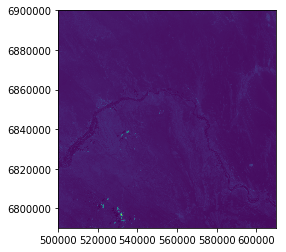

In [19]:
fp = os.path.join(img_dir, 'T34JEP_20170101T082332_B01.jp2')

raster = rasterio.open(fp)

show(raster)

In [26]:
from rasterio import mask

def get_density(geom, raster):
    if geom is None:
        return 0.
    try:
        out_image, out_transform=mask.mask(raster, [geom], crop=True)
    except ValueError:
        return 0.
    return out_image

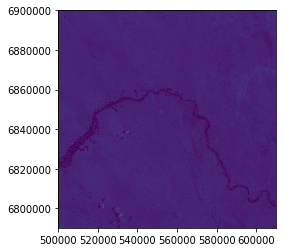

In [47]:
fp = os.path.join(img_dir,'T34JEP_20170101T082332_B04.jp2')

raster = rasterio.open(fp)

show(raster, 1)

In [48]:
masks = [get_density(g, raster) for g in train_df.geometry]

In [49]:
import numpy as np
mask_shapes = [np.size(m) for m in masks]
np.argmax(mask_shapes)

2320

In [ ]:
# out_image, out_transform = rasterio.mask.mask(raster, shapes, crop=True)
# out_meta = src.meta

/Users/renier.botha/anaconda3/envs/geo/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log10
  


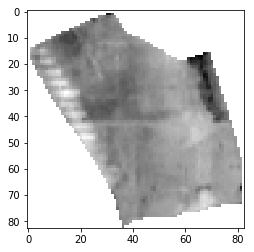

In [50]:
import matplotlib.pyplot as plt
plt.imshow(np.log10(masks[2320][0]), cmap='gray')

In [46]:
for fp in glob(img_dir+'/*'):
    raster = rasterio.open(fp)
    print(os.path.basename(fp))
    print('\t',raster.shape)

T34JEP_20170101T082332_B04.jp2
	 (10980, 10980)
T34JEP_20170101T082332_B10.jp2
	 (1830, 1830)
T34JEP_20170101T082332_B11.jp2
	 (5490, 5490)
T34JEP_20170101T082332_B05.jp2
	 (5490, 5490)
T34JEP_20170101T082332_B07.jp2
	 (5490, 5490)
T34JEP_20170101T082332_B06.jp2
	 (5490, 5490)
T34JEP_20170101T082332_B12.jp2
	 (5490, 5490)
T34JEP_20170101T082332_B02.jp2
	 (10980, 10980)
T34JEP_20170101T082332_B03.jp2
	 (10980, 10980)
T34JEP_20170101T082332_B01.jp2
	 (1830, 1830)
T34JEP_20170101T082332_B8A.jp2
	 (5490, 5490)
T34JEP_20170101T082332_B08.jp2
	 (10980, 10980)
T34JEP_20170101T082332_TCI.jp2
	 (10980, 10980)
T34JEP_20170101T082332_B09.jp2
	 (1830, 1830)


## Stuff not used anymore

In [ ]:
# Reading shapes with FIONA

import fiona

with fiona.open(train_fp, 'r') as shapefile:
    shapes = [feature['geometry'] for feature in shapefile if feature['geometry'] is not None]
    

In [ ]:
import rasterio
from rasterio.windows import Window
from pyproj import Proj
from math import floor, ceil


def longlat2window(lon, lat, dataset):
    """
    Args:
        lon (tuple): Tuple of min and max lon
        lat (tuple): Tuple of min and max lat
        dataset: Rasterio dataset

    Returns:
        rasterio.windows.Window
    """
    p = Proj(dataset.crs)
    t = dataset.transform
    xmin, ymin = p(lon[0], lat[0])
    xmax, ymax = p(lon[1], lat[1])
    col_min, row_min = ~t * (xmin, ymin)
    col_max, row_max = ~t * (xmax, ymax)
    return Window.from_slices(rows=(floor(row_max), ceil(row_min)),
                              cols=(floor(col_min), ceil(col_max)))

In [ ]:
from rasterio import mask

def get_density(geom, raster):
    if geom is None:
        return 0.
    try:
        out_image, out_transform=mask.mask(raster, [geom],crop=True)
    except ValueError:
        return 0.
    return out_image[out_image>0].sum()